# Cancer Drug Trial in Mice

## Overview

A small company specializes in drug-based, anti-cancer pharmaceuticals. Recently, they've  begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

We have complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. We will show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

Below, we will create plots to show:
* How the tumor volume changes over time for each treatment.
* How the number of metastatic (cancer spreading) sites changes over time for each treatment.
* The number of mice still alive through the course of treatment (survival rate).
* The total tumor volume change for each drug across the full 45 days of the trial.


In [63]:
# Dependencies.

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
cd = os.path.abspath(".") # Establish current directory.

# Read our data from csv files into two data frames.

clinicalDf = pd.read_csv(os.path.join(cd, 'clinicaltrial_data.csv'))
mouseDf = pd.read_csv(os.path.join(cd, 'mouse_drug_data.csv'))

In [65]:
clinicalDf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [66]:
len(clinicalDf)

1893

In [67]:
mouseDf.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [68]:
len(mouseDf)

250

In [69]:
combinedDf = pd.merge(clinicalDf, mouseDf, left_on = 'Mouse ID', right_on = 'Mouse ID', how = 'left')

In [70]:
combinedDf.tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
1901,r944,45,41.581521,2,Capomulin
1902,u364,45,31.023923,3,Capomulin
1903,p438,45,61.433892,1,Ceftamin
1904,x773,45,58.634971,4,Placebo
1905,b879,45,72.555239,2,Stelasyn


In [71]:
len(combinedDf)

1906

In [72]:
drugs = combinedDf[combinedDf.Drug.isin( ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])]
drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [73]:
len(drugs)

777

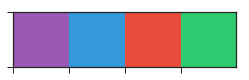

In [74]:
palete1 = ["#9b59b6", "#3498db", "#e74c3c", "#2ecc71"]
sns.set_palette(palete1)
sns.palplot(sns.color_palette())
plt.show()

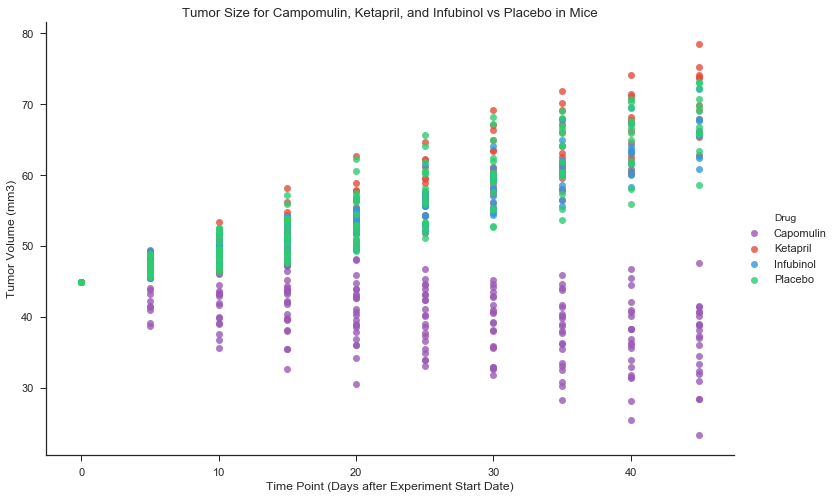

In [92]:

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

tumorWeight1 = sns.lmplot('Timepoint',
                         'Tumor Volume (mm3)',
                         data = drugs,
                         fit_reg = False,
                         hue = 'Drug',
                         scatter = True,
                         size = 7,
                         aspect = 1.5
                        )
plt.title('Tumor Size for Campomulin, Ketapril, and Infubinol vs Placebo in Mice')
plt.xlabel('Time Point (Days after Experiment Start Date)')

plt.show()
# plt.ylabel('Deaths')

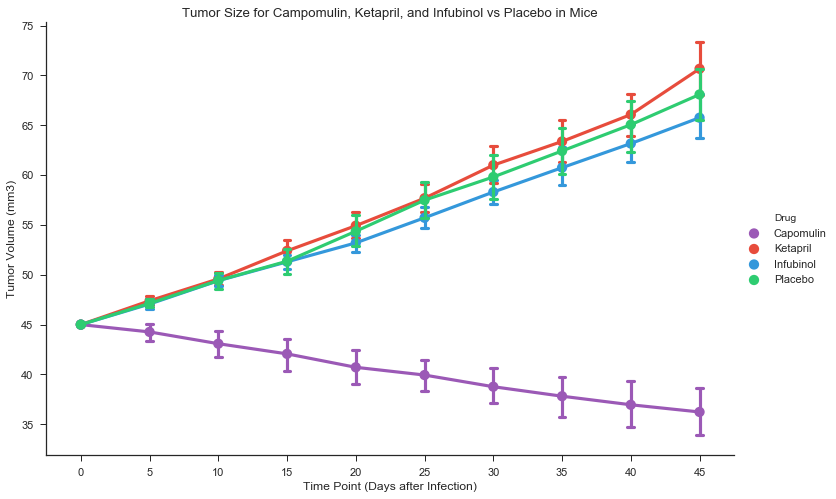

In [91]:
# Draw a pointplot to show pulse as a function of three categorical factors
tumorWeight2 = sns.factorplot(x = "Timepoint",
                   y = "Tumor Volume (mm3)",
                   hue = "Drug",
                   data = drugs,
                   capsize = .1,
                   size = 7,
                   aspect = 1.5
                  )
plt.title('Tumor Size for Campomulin, Ketapril, and Infubinol vs Placebo in Mice')
plt.xlabel('Time Point (Days after Infection)')
# g.despine(left = True)
plt.show()

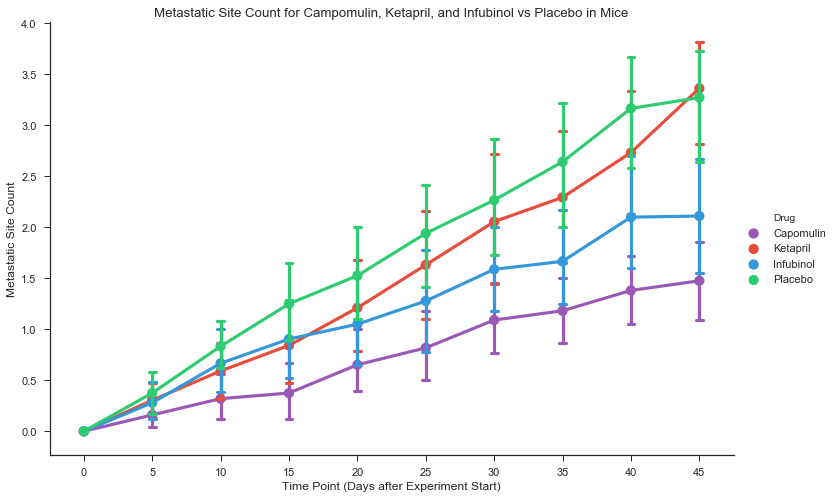

In [93]:
# Draw a pointplot to show pulse as a function of three categorical factors
MetaSites = sns.factorplot(x = "Timepoint",
    y = "Metastatic Sites",
    hue = "Drug",
    data = drugs,
    capsize = .1,
    size = 7,
    aspect = 1.5
    )
plt.title('Metastatic Site Count for Campomulin, Ketapril, and Infubinol vs Placebo in Mice')
plt.xlabel('Time Point (Days after Experiment Start)')
plt.ylabel('Metastatic Site Count')
plt.show()

In [78]:
drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [79]:
survival = pd.DataFrame(drugs.groupby(['Timepoint','Drug']).agg({'Mouse ID' : ['count']})).reset_index()
list(survival)

[('Timepoint', ''), ('Drug', ''), ('Mouse ID', 'count')]

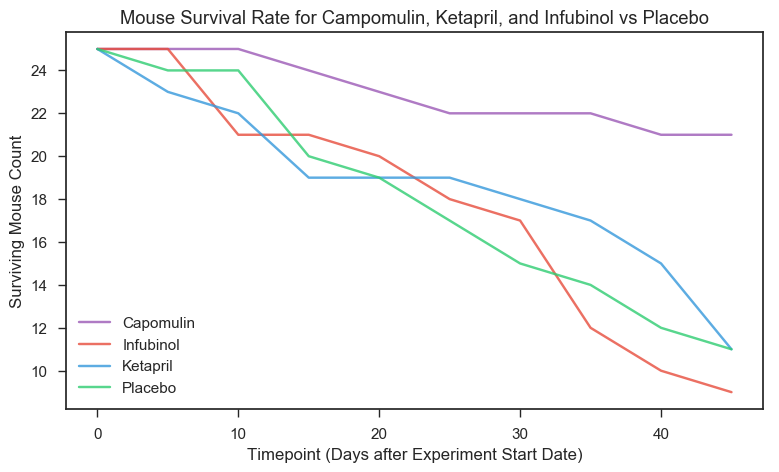

In [94]:
palete1 = ["#9b59b6", "#e74c3c", "#3498db", "#2ecc71"]
sns.set_palette(palete1)

figa = plt.figure(figsize=(9, 5), dpi= 100)
ax1 = figa.add_subplot(1,1,1)

for i in  survival['Drug'].unique():
    series = survival[survival['Drug'] == i]
    ax1.plot(
    series.Timepoint, 
    series['Mouse ID'],
    label = i,
    alpha=.8,
            )
ax1.legend()
ax1.set_xlabel('Timepoint (Days after Experiment Start Date)')
ax1.set_ylabel('Surviving Mouse Count')
ax1.set_title('Mouse Survival Rate for Campomulin, Ketapril, and Infubinol vs Placebo')
plt.show()

In [81]:
drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [82]:
# To get the overall change in tumor size by drug, group our original drug dataframe by timepoint and drug name
# aggregating the tumor volume with mean().

tumor = pd.DataFrame(drugs.groupby(['Timepoint','Drug']).agg({'Tumor Volume (mm3)' : ['mean']})).reset_index()

In [83]:
tumor.head()

,Timepoint,Drug,Tumor Volume (mm3)
,,,mean
0,0,Capomulin,45.000000
1,0,Infubinol,45.000000
2,0,Ketapril,45.000000
3,0,Placebo,45.000000
4,5,Capomulin,44.266086


In [84]:
tumor['Drug'].unique()

array(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype=object)

In [85]:
tumorChanges = []
for drug in tumor['Drug'].unique():
    minimum = tumor[tumor['Drug'] == drug]['Timepoint'].idxmin()
    maximum = tumor[tumor['Drug'] == drug]['Timepoint'].idxmax()
    maxWeight = tumor.iloc[maximum]['Tumor Volume (mm3)'].values 
    minWeight = tumor.iloc[minimum]['Tumor Volume (mm3)'].values 
    tumorChanges.append([drug, round(float((maxWeight - minWeight)/minWeight*100), 2)])

In [86]:
tumorChange = pd.DataFrame(tumorChanges, columns=['Drug', 'Percent Change'])
tumorChange

,Drug,Percent Change
0,Capomulin,-19.48
1,Infubinol,46.12
2,Ketapril,57.03
3,Placebo,51.30


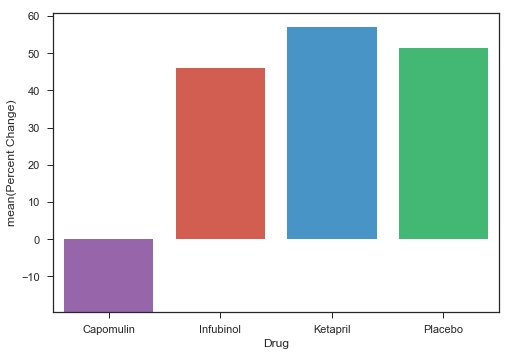

In [87]:
# palete1 = ["#9b59b6", "#3498db", "#e74c3c", "#2ecc71"]
# sns.set_palette(palete1)

bar1 = sns.barplot('Drug', 'Percent Change', data=tumorChange)
plt.show()

In [95]:
## Some Conclusions

